<a href="https://colab.research.google.com/github/phongidoit/CS114/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
oimport matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

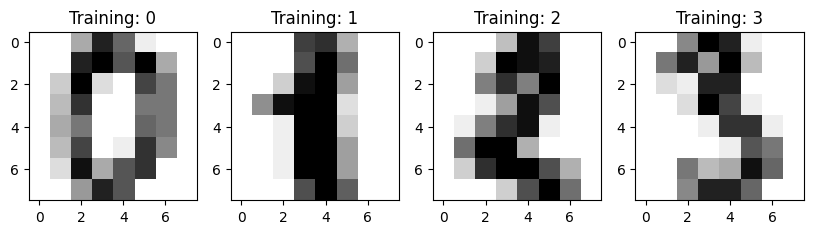

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 6))
for ax, image, label in zip(axes, digits.images, digits.target):
    #ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

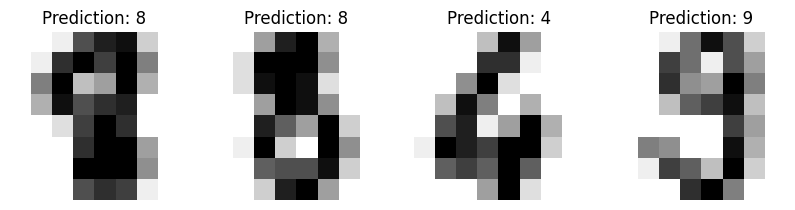

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




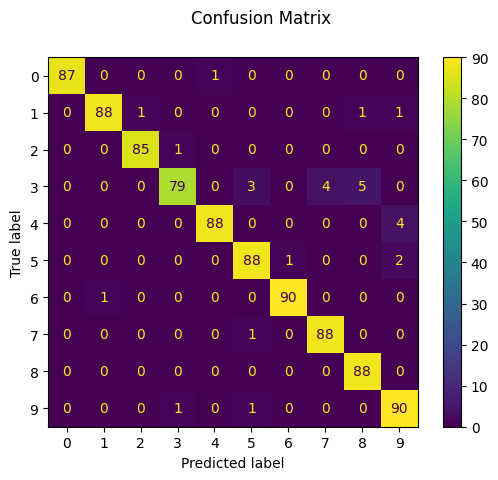

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Lấy file chứa dữ liệu và giải nén

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= False)

#!wget https://github.com/phongidoit/CS114/blob/main/Handwritting.zip
#!git clone https://github.com/phongidoit/CS114

!unzip -q '/content/drive/MyDrive/data ML/DTS3.zip' -d /content/Handwritting
path = "/content/Handwritting/DTS3"

Mounted at /content/drive


Tạo label cho từng ảnh bằng cách lấy ảnh của thư mục

In [ ]:
#sửa lại size ảnh
import os
labels, X= [], []
for dir in [f.path for f in os.scandir(path) if f.is_dir()]:  
  #tên file là tên label
  temp_label = dir.split('/')[-1]
  for file in next(os.walk(dir), (None, None, []))[2]:
    if file != ".ipynb_checkpoints":
        file_path = os.path.join(dir, file)
        labels.append(temp_label)
        X.append(file_path)
        #center_cropping
labels= [int(ele) for ele in labels]

Hàm gray_resize để đổi ảnh về màu xám có kích thước 8x8\
Hàm enhance_image để chuyển ảnh từ 8 bit -> 4 bit\
Hàm flatten để đổi ảnh ma trận 2 chiều về list 1 chiều


In [ ]:
import cv2
def gray_resize(img_source):
  
  img= cv2.imread(img_source)
  img = cv2.resize(img, (8,8), cv2.INTER_NEAREST )
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return img

def enhance_image(img):
  #decrease from 8 bit image to 4 bit image:
  for i in range(8):
    for k in range(8): 
        img[i][k] = 16 - int(img[i][k]/256*16)
        if img[i][k]<=7:
          img[i][k] = max(img[i][k]-6, 0)
        else:
          img[i][k] = min(img[i][k]+5, 15)
  return img

def flatten(img):
  arr=[]
  for row in img:
    for ele in row:
        arr.append(ele)
  return arr 

102 102
/content/Handwritting/DTS3/8/348368729_655337549757522_5878476646820923783_n.jpg
predicted:  [8]


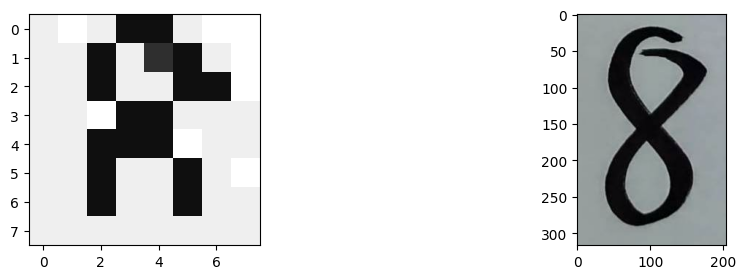

In [ ]:
import cv2
print(len(X), len(labels))
index= 59

print(X[index])
im = X[index]
im = gray_resize(img_source= im)
im = enhance_image(im)
print("predicted: ", clf.predict([flatten(im)]))

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.imshow(im, cmap=plt.cm.gray_r, interpolation="nearest",vmin=0, vmax=16)
plt.subplot(1,2,2)
plt.imshow(cv2.imread(X[index]))

Thực hiện dự đoán trên tập được tải lên

In [ ]:
X_img = [flatten(enhance_image(gray_resize(img_source=img_path))) for img_path in X]
y_pred= clf.predict(X_img)
#print(y_pred)

correct_guess=0
for i in range(len(y_pred)):
  if y_pred[i] == labels[i]:
    correct_guess += 1
print("Correct prediction: ",correct_guess, "\t|Correct percentage:", f'{correct_guess/len(y_pred):.4f}')    

Correct prediction:  50 Correct percentage: 0.4902


In ra confusion matrix

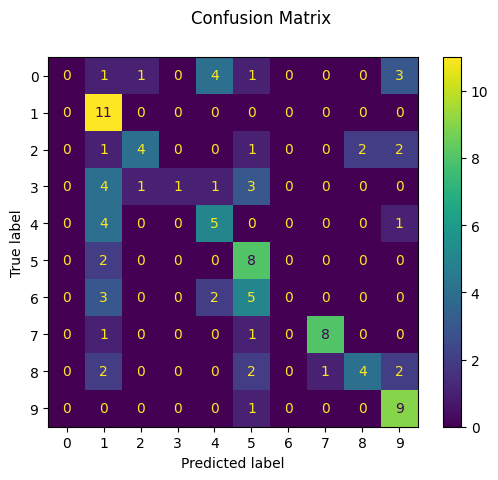

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(labels, y_pred)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
cm = disp.confusion_matrix

y_true = []
y_pred = []
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.38      1.00      0.55        11
           2       0.67      0.40      0.50        10
           3       1.00      0.10      0.18        10
           4       0.42      0.50      0.45        10
           5       0.36      0.80      0.50        10
           6       0.00      0.00      0.00        10
           7       0.89      0.80      0.84        10
           8       0.67      0.36      0.47        11
           9       0.53      0.90      0.67        10

    accuracy                           0.49       102
   macro avg       0.49      0.49      0.42       102
weighted avg       0.49      0.49      0.42       102




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
